### Week 10: Random Variable and Probability Distribution
# Final Project

1. **Deskriptif Statistik**: Tampilkan statistik deskriptif untuk setiap variabel.
2. **Distribusi Probabilitas**: Lakukan uji distribusi pada setiap variabel untuk mengamati apakah variabel-variabel tersebut mengikuti distribusi tertentu (misalnya, normal, uniform, dll). Anda dapat menggunakan visualisasi histogram dan density plot, atau menerapkan metode uji statistik yang sesuai.
3. **Menghitung Probabilitas**: Hitung probabilitas kejadian tertentu, seperti "pelanggan memiliki kepuasan di atas 4".

## Import Data

Dataset diambil dari: 

https://www.kaggle.com/datasets/masnunu/dataset-digital-marketing

In [4]:
import pandas as pd

In [ ]:
df = pd.read_csv("./data_pelanggan_200.csv")

In [8]:
df

,ID Pelanggan,Usia,Jenis Kelamin,Pendapatan,Durasi Kunjungan (menit),Produk Dilihat,Frekuensi Pembelian,Rating Kepuasan,Lokasi Geografis,Media Sosial,Pekerjaan
0,1,59,Wanita,56506,19,3,3,5,Kota A,Instagram,Freelancer
1,2,34,Pria,140094,48,3,4,1,Kota C,Twitter,Mahasiswa
2,3,30,Wanita,87596,32,6,0,5,Kota C,Facebook,PNS
3,4,57,Wanita,93232,42,10,3,5,Kota C,Instagram,PNS
4,5,56,Pria,120055,18,1,4,2,Kota B,Instagram,Freelancer
...,...,...,...,...,...,...,...,...,...,...,...
195,196,21,Wanita,86584,53,5,1,1,Kota B,Instagram,Karyawan Swasta
196,197,20,Pria,32141,40,2,2,5,Kota B,Twitter,Freelancer
197,198,21,Wanita,141253,11,5,2,1,Kota B,Instagram,Freelancer
198,199,37,Wanita,136533,27,3,3,1,Kota A,Twitter,PNS


In [16]:
df.columns

Index(['ID Pelanggan', 'Usia', 'Jenis Kelamin', 'Pendapatan',
       'Durasi Kunjungan (menit)', 'Produk Dilihat', 'Frekuensi Pembelian',
       'Rating Kepuasan', 'Lokasi Geografis', 'Media Sosial', 'Pekerjaan'],
      dtype='object')

---

## Analisis Faktor Rating Kepuasan

### 1. Statistika Deskriptif

In [80]:
df["Rating Kepuasan"].describe()

count    200.000000
mean       2.975000
std        1.468043
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Rating Kepuasan, dtype: float64

### 2. Uji Distribusi Probabilitas

In [88]:
import math

n = len(df)

# Menentukan banyak kelas
kelas = math.ceil(1 + 3.3 * math.log(n, 10))
print("Banyak kelas =", k)

Banyak kelas = 9


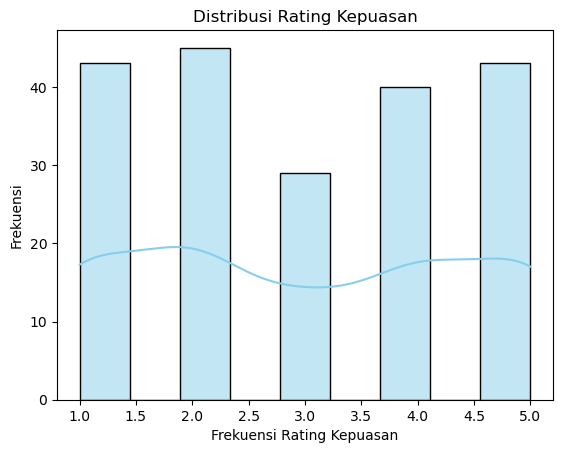

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi dengan histogram dan density plot
sns.histplot(df['Rating Kepuasan'], bins=kelas, kde=True, color='skyblue')
plt.title("Distribusi Rating Kepuasan")
plt.xlabel("Frekuensi Rating Kepuasan")
plt.ylabel("Frekuensi")
plt.show()

In [92]:
from scipy.stats import shapiro

stat, p = shapiro(df['Rating Kepuasan'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data mengikuti distribusi normal')
else:
    print('Data tidak mengikuti distribusi normal')

Statistics=0.873, p=0.000
Data tidak mengikuti distribusi normal


### 3. Menghitung Probabilitas

#### **Jika Data Berdistribusi Normal**
1. Hitung rata-rata dan standar deviasi dari data.
2. Gunakan Distribusi Normal untuk menghitung probabilitas. Misalnya, untuk probabilitas X > 4, gunakan 1 - norm.cdf(4, mean, std_dev).

#### **Jika Data Tidak Berdistribusi Normal**
1. Metode Empiris (Non-parametrik): Menggunakan metode perhitungan probabilitas dasar, dengan menghitung proporsi data yang memenuhi kriteria (misalnya X > 4) dari total data, tanpa asumsi distribusi.
2. Transformasi Data: Melakukan transformasi (misalnya, log atau Box-Cox) untuk mendekati distribusi normal, lalu gunakan metode normal.
3. Distribusi Lain (Parametrik): Jika data mengikuti distribusi selain normal, misalnya log-normal atau gamma, gunakan distribusi tersebut untuk menghitung probabilitas.

#### Metode Empiris

In [124]:
nA = len(df[df['Rating Kepuasan'] > 4])
nS = len(df)

print("nA: ", nA, "nS: ", nS)
probabilitas_empiris = nA / nS * 100
print(f"Probabilitas empiris (kepuasan > 4): {probabilitas_empiris:.2f}%")

nA:  43 nS:  200
Probabilitas empiris (kepuasan > 4): 21.50%


#### Transformasi Data

In [141]:
import numpy as np

# Transformasi log 
df['kepuasan_log'] = np.log(df['Rating Kepuasan'] + 1)

# Hitung rata-rata dan standar deviasi dari data yang telah ditransformasi
mean_kepuasan_log = df['kepuasan_log'].mean()
std_kepuasan_log = df['kepuasan_log'].std()

# Hitung probabilitas kepuasan > log(4) pada data yang ditransformasi
probabilitas_log = (1 - norm.cdf(np.log(4 + 1), mean_kepuasan_log, std_kepuasan_log)) * 100
print(f"Probabilitas setelah transformasi log (kepuasan > 4): {probabilitas_log:.2f}%")

# Uji normalitas 
stat, p = shapiro(df['kepuasan_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data mengikuti distribusi normal')
else:
    print('Data tidak mengikuti distribusi normal')

Probabilitas setelah transformasi log (kepuasan > 4): 22.37%
Statistics=0.863, p=0.000
Data tidak mengikuti distribusi normal


---

## Analisis Faktor Frekuensi Pembelian

### 1. Statistika Deskriptif

In [18]:
df["Frekuensi Pembelian"].describe()

count    200.000000
mean       2.370000
std        1.663411
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Frekuensi Pembelian, dtype: float64

In [54]:
import math

n = len(df)

# Menentukan banyak kelas
kelas = math.ceil(1 + 3.3 * math.log(n, 10))
print("Banyak kelas =", k)

Banyak kelas = 9


### 2. Uji Distribusi

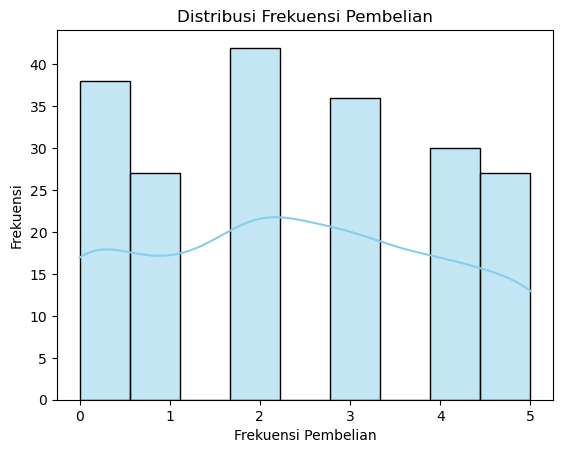

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi dengan histogram dan density plot
sns.histplot(df['Frekuensi Pembelian'], bins=kelas, kde=True, color='skyblue')
plt.title("Distribusi Frekuensi Pembelian")
plt.xlabel("Frekuensi Pembelian")
plt.ylabel("Frekuensi")
plt.show()

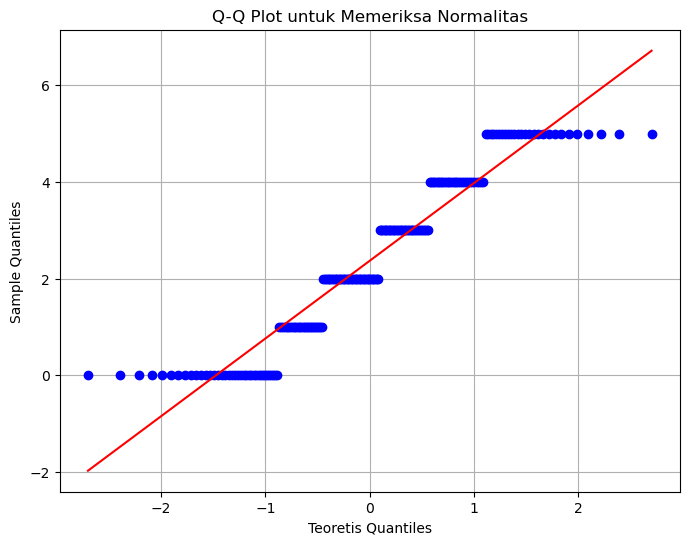

In [63]:
import scipy.stats as stats

# Uji normalitas dgn Q-Q Plot 
plt.figure(figsize=(8, 6))
stats.probplot(df['Frekuensi Pembelian'], dist="norm", plot=plt)
plt.title('Q-Q Plot untuk Memeriksa Normalitas')
plt.xlabel('Teoretis Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

In [77]:
from scipy.stats import kstest, norm

stat, p = kstest(df['Frekuensi Pembelian'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data mengikuti distribusi normal')
else:
    print('Data tidak mengikuti distribusi normal')

Statistics=0.652, p=0.000
Data tidak mengikuti distribusi normal


## Analisis Faktor Lokasi 

In [21]:
df["Lokasi Geografis"].describe()

count        200
unique         3
top       Kota A
freq          75
Name: Lokasi Geografis, dtype: object